In [0]:
#Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [47]:
#Using Google colab for developing the solution, Colob doesnt have surprise library by default, hence installing it through pip
!pip install surprise

In [0]:
#Importing necessary surprise libraries
from surprise import KNNWithMeans,Dataset, accuracy, Reader,KNNBasic
from surprise.model_selection import train_test_split

In [49]:
#The given input data file is too huge to load it in github and load here, hence making use of Google drive service to load the file. It asks for 
#authentication each time.
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Once the google drive file is mounted then the corresponding given input file is loaded on Dataframe.
ratings_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/ratings_Electronics.csv")

In [51]:
ratings_df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


The given input does not have the column headers hence declaring the same based on the given input variable names.

In [52]:
columns = ["userId", "productId", "Rating", "timeStamp"]
ratings_df.columns = columns
ratings_df.head()

,userId,productId,Rating,timeStamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


timeStamp column can be dropped from original dataset it is not going to be used for further analysis.

In [53]:
ratings_df.drop(["timeStamp"], axis = 1, inplace = True)
ratings_df.head(2)

,userId,productId,Rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0


(array([0.28812294, 0.        , 0.14579945, 0.        , 0.        ,
        0.20227316, 0.        , 0.4747219 , 0.        , 1.38908255]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

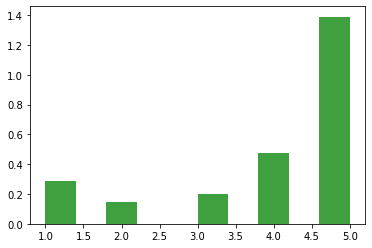

In [54]:
plt.hist(ratings_df["Rating"], density = True, facecolor = 'green', alpha = 0.75)

Checking the tendency of ratings present on the dataset, the majority of the ratings are in higher end.

In [55]:
#Finding out the count of ratings based on UserId, so that it can b benefitial to filter the most rated users.
mostRatedUsers = pd.DataFrame(ratings_df.groupby('userId')['Rating'].count())
mostRatedUsers.columns = ["User_Rating_Count"]
mostRatedUsers.head()

,User_Rating_Count
userId,
A00000262KYZUE4J55XGL,1
A000063614T1OE0BUSKUT,2
A00009182QVLSWIGHLS1B,1
A00009661LC9LQPGKJ24G,1
A00010809P09NUU6ZP6H,1


In [56]:
print(ratings_df.shape)
ratings_df["User_Rating_Count"] = ratings_df.userId.map(mostRatedUsers.User_Rating_Count)
print(ratings_df.shape)

(7824481, 3)
(7824481, 4)


In [57]:
ratings_df.head()

,userId,productId,Rating,User_Rating_Count
0,A2CX7LUOHB2NDG,0321732944,5.0,4
1,A2NWSAGRHCP8N5,0439886341,1.0,1
2,A2WNBOD3WNDNKT,0439886341,3.0,1
3,A1GI0U4ZRJA8WN,0439886341,1.0,1
4,A1QGNMC6O1VW39,0511189877,5.0,2


Filtering the dataframe to have only the subset of data which is the users who rated more than 100 products, it would have better if it is filtered >50
but the subset dataset is huge and it could not be handled in the 
Google colab's TPU/GPU as well, hence due to machine limitations handled
with >100, ideally this value can be taken based on the discussion with Business.

In [58]:
ratings_df_filtered = ratings_df[ratings_df['User_Rating_Count'] > 100]
print("Shape after filtering: ", ratings_df_filtered.shape)
ratings_df_filtered.head()

Shape after filtering:  (43309, 4)


,userId,productId,Rating,User_Rating_Count
117,AT09WGFUM934H,0594481813,3.0,110
177,A17HMM1M7T9PJ1,0970407998,4.0,151
630,A3TAS1AG6FMBQW,0972683275,5.0,163
1776,A18S2VGUH9SCV5,1400501776,4.0,149
2161,A5JLAU2ARJ0BO,1400532655,1.0,520


Split Train and test data to have 30% test data

In [0]:
#converting dataframe to Dataset
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_df_filtered[columns[0:3]], reader)
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [60]:
#Popularity based recommendation System:
pop_recommendations = pd.DataFrame(ratings_df_filtered.groupby('productId')['Rating'].mean().sort_values(ascending = False))
pop_recommendations['productId'] = pop_recommendations.index
pop_recommendations['Mean_Rating'] = pop_recommendations['Rating']
pop_recommendations.drop(labels='Rating', axis=1,  inplace=True)
print("Populartiy based Recommendations:")
print(pop_recommendations.head(10))

Populartiy based Recommendations:
             productId  Mean_Rating
productId                          
B00LKG1MC8  B00LKG1MC8          5.0
B004ULOZPQ  B004ULOZPQ          5.0
B004UR72IM  B004UR72IM          5.0
B004UR7250  B004UR7250          5.0
B004UR487A  B004UR487A          5.0
B000V9F3BG  B000V9F3BG          5.0
B004UQ05N2  B004UQ05N2          5.0
B004UQ05M8  B004UQ05M8          5.0
B000V9GCP2  B000V9GCP2          5.0
B004ULPF50  B004ULPF50          5.0


Irrespective of Number of ratings per product and userId the popularity based recommendations displayes the ProductIds.

Even though populartiy based recommended system, since there is an option to still make it in descending order based on the number of ratings for that product in the below code.

In [61]:
pop_recommendations['Product_Rating_Count'] = pd.DataFrame(ratings_df_filtered.groupby('productId')['Rating'].count())
pop_recommendations.sort_values(['Mean_Rating', 'Product_Rating_Count'], ascending=[False, False], inplace= True)
print(pop_recommendations.head(10))

             productId  Mean_Rating  Product_Rating_Count
productId                                                
B003ES5ZUU  B003ES5ZUU          5.0                    54
B0052SCU8U  B0052SCU8U          5.0                    15
B0000BZL1P  B0000BZL1P          5.0                    13
B00HZWJGS8  B00HZWJGS8          5.0                    13
B00CMJZAOI  B00CMJZAOI          5.0                    12
B00ISFNSBW  B00ISFNSBW          5.0                    12
B0036Q7MV0  B0036Q7MV0          5.0                    11
B00L3YHF6O  B00L3YHF6O          5.0                    11
B00017LSPI  B00017LSPI          5.0                    11
B00006JN3G  B00006JN3G          5.0                    10


Now the result of productIds are different when it is filtered based on Mean Rating after which the Product Ratings Count.
Through this recommended system there is no provision to suggest different
content based on the logged in user.! 

Building Colloborative Filter recommendation System:
Item-Item

In [62]:
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(train)
# run the trained model against the test data
test_pred_item = algo_item.test(test)
# RMSE
accuracy.rmse(test_pred_item, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0913


1.091277553956987

User-User Colloborative Filtering

In [63]:
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(train)
# run the trained model against the test data
test_pred_user = algo_user.test(test)
# RMSE
accuracy.rmse(test_pred_user, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0421


1.0421194470949162

User-User Colloborative Filtering has less RMSE than Item-Item Filtering and it has better performance. But Still not the best.

In [0]:
#Reference python code reusable method from https://blog.dominodatalab.com/recommender-systems-collaborative-filtering/
from collections import defaultdict
def get_top_recommendations(predictions, top = 5):
  top_recs = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    top_recs[uid].append((iid, est))
  for uid, user_ratings in top_recs.items():
    user_ratings.sort(key = lambda x: x[1], reverse = True)
    top_recs[uid] = user_ratings[:top]
  return top_recs

With the help above reusable method the top recommendations are grouped based on the userId from the predictions. so that based on the logged in User with the help of below lines of code, the application can be able to suggest recommended products to the user. This will provide various type of recommendations based on the logged in User. 
This is much better than the Popularity based Recommendation system.

In [72]:
top_recommendations_user = get_top_recommendations(test_pred_user,5)
top_recommendations_user

defaultdict(list,
            {'A100UD67AHFODS': [('B0054JJ0QW', 4.986345061297717),
              ('B000LRMS66', 4.458452493030327),
              ('B004I5BUSO', 4.443037974683544),
              ('B0088PU86K', 4.443037974683544),
              ('B009W8YQ6K', 4.443037974683544)],
             'A100WO06OQR8BQ': [('B003MVZ60I', 5),
              ('B004CLYE8C', 4.662260795115481),
              ('B009DCNP9O', 4.317171717171717),
              ('B0090J652Y', 4.312409812409812),
              ('B004HYG9W8', 4.28569072436997)],
             'A10PEXB6XAQ5XF': [('B00829THEG', 4.948858447488584),
              ('B002RCNX8K', 4.7586623690572125),
              ('B0023NVS30', 4.66113914924297),
              ('B00GO1UV4E', 4.603871353062807),
              ('B004SBBD8U', 4.583320038259621)],
             'A10Y058K7B96C6': [('B0019EHU8G', 5),
              ('B001Q3M9PY', 5),
              ('B002GTAUT4', 5),
              ('B00192KCAG', 5),
              ('B0026HMKFI', 5)],
             'A10ZFE6YE

In [66]:
top_recommendations_item = get_top_recommendations(test_pred_item,5)
top_recommendations_item

defaultdict(list,
            {'A100UD67AHFODS': [('B0054JJ0QW', 5),
              ('B0090I9VQW', 5),
              ('B003O8682Y', 5),
              ('B00108UNEY', 5),
              ('B004TLIVB6', 5)],
             'A100WO06OQR8BQ': [('B00DQZT0AC', 5),
              ('B007K3SB6K', 5),
              ('B0026IBJMM', 5),
              ('B004CLYEH8', 4.722618587323712),
              ('B000IF51UQ', 4.5)],
             'A10PEXB6XAQ5XF': [('B000ID7QNI', 5),
              ('B00EL93M3S', 5),
              ('B0050IE1O8', 5),
              ('B00EPY0RI2', 5),
              ('B00691YKE6', 5)],
             'A10Y058K7B96C6': [('B004DVEW8I', 5),
              ('B00064V6RG', 5),
              ('B00D429Y12', 5),
              ('B004LSNF04', 5),
              ('B00BCA41PW', 5)],
             'A10ZFE6YE0UHW8': [('B005GTNZUM', 5),
              ('B004UHDUNI', 5),
              ('B00HBYKVA2', 5),
              ('B00BMGTAQ6', 5),
              ('B000OUW7OI', 5)],
             'A11D1KHM7DVOQK': [('B0007Y79AI

In [67]:
given_userId = "A100UD67AHFODS"
print(top_recommendations_user[given_userId])  
print(top_recommendations_item[given_userId])

[('B0054JJ0QW', 4.986345061297717), ('B000LRMS66', 4.458452493030327), ('B004I5BUSO', 4.443037974683544), ('B0088PU86K', 4.443037974683544), ('B009W8YQ6K', 4.443037974683544)]
[('B0054JJ0QW', 5), ('B0090I9VQW', 5), ('B003O8682Y', 5), ('B00108UNEY', 5), ('B004TLIVB6', 5)]


In [0]:
#Pretty Print only productIds
def printRecommendations(list):
  for i in range(0,5):
    print(list[i][0],end =",")
  print("\n")

In [70]:
print("Recommendated Products User-User:")
printRecommendations(top_recommendations_user[given_userId])
print("Recommendated Products Item-Item:")
printRecommendations(top_recommendations_item[given_userId])

Recommendated Products User-User:
Recommendated Products:
B0054JJ0QW,B000LRMS66,B004I5BUSO,B0088PU86K,B009W8YQ6K,

Recommendated Products Item-Item:
Recommendated Products:
B0054JJ0QW,B0090I9VQW,B003O8682Y,B00108UNEY,B004TLIVB6,



For the given UserId the above are the products would be recommended based on the user predicted user ratings.

The list is not exactly matching, however the first recommended product is the same through both the options. 